In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
SUBMISSION_DIR = "mmdetection/work_dirs/basic_augment/submission_epoch_23.csv"
inference_table = pd.read_csv(SUBMISSION_DIR)

category, confidence, xmin, ymin, xmax, ymax image

In [3]:
from PIL import Image, ImageDraw, ImageFont
import random

cate_dict = {
	'0' : 'General trash', '1' : 'Paper', '2' : 'Paper pack', '3' : 'Metal', 
	'4' : 'Glass', '5' : 'Plastic', '6' : 'Styrofoam', '7' : 'Plastic bag', 
	'8' : 'Battery', '9' : 'Clothing'
	}

color  = {
	'0' : (255, 0, 0), '1' : (255, 94, 0), '2' : (255, 228, 0), '3' : (29, 219, 22), 
	'4' : (1, 0, 255), '5' : (95, 0, 255), '6' : (255, 0, 221), '7' : (34, 116, 28), 
	'8' : (103, 153, 255), '9' : (255, 0, 127)
	}

def getPILImage(imageId):
	fileName = inference_table['image_id'][imageId]

	imagePath = os.path.join("dataset",fileName)
	return Image.open(imagePath)

def drawInferenceImage(imageId):
	prediction = inference_table['PredictionString'][imageId].split()
	img = getPILImage(imageId)
	draw = ImageDraw.Draw(img)
	bbox_cate = []
	bbox = []
	# Prediction string bbox 묶음으로 나누기 (confidence, xmin, ymin, xmax, ymax)
	for i in range(0, len(prediction), 6):
		bbox_cate.append(prediction[i])
		bbox.append(list(map(float, prediction[i+1:i+6])))
		
	for categoryName, bbox in zip(bbox_cate, bbox):

		score, x_min, y_min, x_max, y_max = bbox
		draw.rectangle(((x_min,y_min),(x_max,y_max)),width=3 ,outline=(color[prediction[i]]))

		imageFont = ImageFont.load_default()
		text = f"{cate_dict[prediction[i]]} {score}" 
		text_width, text_height = imageFont.getsize(text)
		draw.rectangle(((x_min, y_min - text_height), (x_min + text_width, y_min)), fill=(0, 0, 0))
		draw.text((x_min, y_min - text_height), text, font=imageFont, fill=(255, 255, 255))

	return img

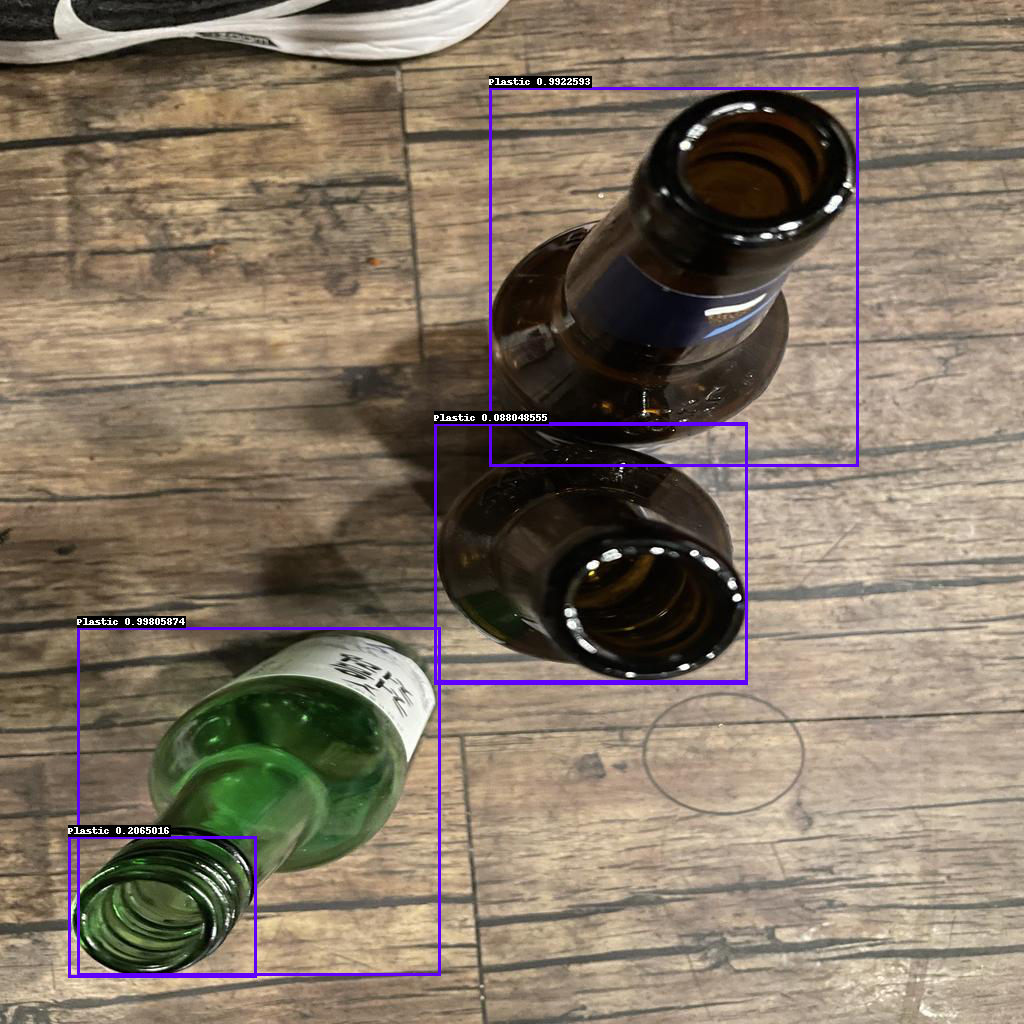

In [11]:
imageId = 2000 # 여기 바꿔서 확인해보기!
imgs = drawInferenceImage(imageId)

imgs